In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('dataset/imgs_2021070511352146227/trainset/merged_train.csv')
test_df = pd.read_csv('dataset/imgs_2021070511352146227/testset/merged_test.csv')

In [4]:
train_df.head()

,timeStamp,logs
0,5381987,['sysmonitor pkill parent getosstat send sigte...
1,5381990,['sysmonitor pkill parent getosstat send sigte...
2,5381992,['sysmonitor pkill parent getosstat send sigte...
3,5381994,['sysmonitor bash parent bash send sigkill bas...
4,5381996,['sysmonitor pkill parent getosstat send sigte...


In [11]:
print(len(train_df))

22100


In [5]:
train_df.head()

,timeStamp,logs
0,5381987,['sysmonitor pkill parent getosstat send sigte...
1,5381990,['sysmonitor pkill parent getosstat send sigte...
2,5381992,['sysmonitor pkill parent getosstat send sigte...
3,5381994,['sysmonitor bash parent bash send sigkill bas...
4,5381996,['sysmonitor pkill parent getosstat send sigte...


In [13]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
)
tfidf.fit(train_df['logs'])
text = tfidf.transform(train_df['logs'])

In [29]:
print(text.shape)

(22100, 283)


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters


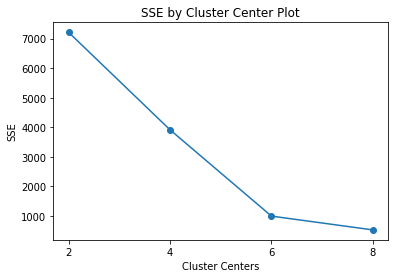

In [32]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 8)

In [53]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

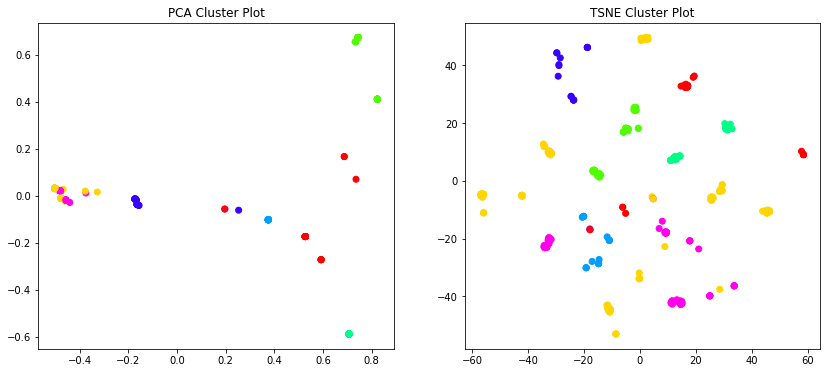

In [54]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=6).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=2).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

TypeError: list indices must be integers or slices, not tuple

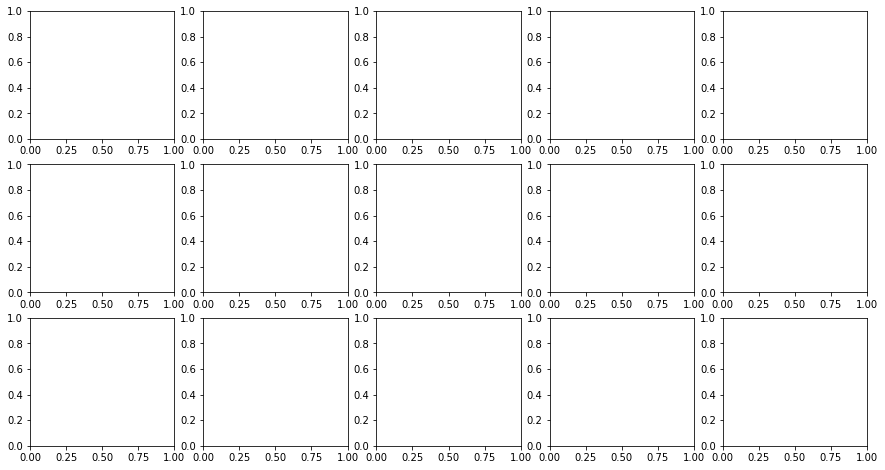

In [52]:
from sklearn import manifold
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
perplexity=11
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
red = 0
green = 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

tsne = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=perplexity)
Y = tsne.fit_transform(text)
ax.set_title("Perplexity=%d" % perplexity)
ax.scatter(Y[red, 0], Y[red, 1], c="r")
ax.scatter(Y[green, 0], Y[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')